In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
df.isnull().sum()/len(df) *100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [47]:
print(df['Over18'].nunique())
print(df['EmployeeCount'].nunique())
print(df['StandardHours'].nunique())

1
1
1


## Since These Three Column Have Only 1 Value We can Drop THem

In [48]:
drop = ['Over18','EmployeeCount','StandardHours']
df.drop(drop,inplace=True,axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [49]:
df.groupby('BusinessTravel')['Age'].sum()


BusinessTravel
Non-Travel            5493
Travel_Frequently    10098
Travel_Rarely        38687
Name: Age, dtype: int64

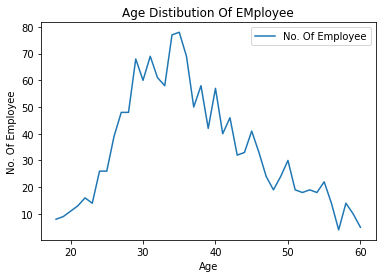

In [50]:
plt.plot(df.groupby('Age')['Age'].count(),label='No. Of Employee')

plt.title('Age Distibution Of EMployee')
plt.xlabel('Age')     
plt.ylabel('No. Of Employee')
plt.legend()

plt.show()

## Maximum Employee Are Of 30-35 Age Group. Oldest Employee Is Of Age Of 60 . And 8 Youngest Employee Of Age 18 In The DataSet

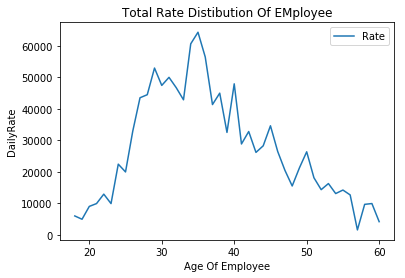

In [51]:
plt.plot(df.groupby('Age')['DailyRate'].sum(),label='Rate')

plt.title('Total Rate Distibution Of EMployee')
plt.xlabel('Age Of Employee')     
plt.ylabel('DailyRate')
plt.legend()

plt.show()

## Maximum DailyRate Is Of Age Group 30-40

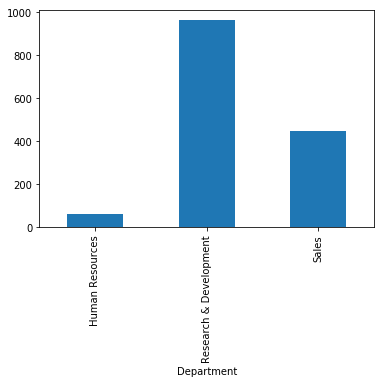

In [52]:
df.groupby('Department')['Age'].count().plot(kind="bar")

## Maximum Emloyyee Are In Research And Development Department

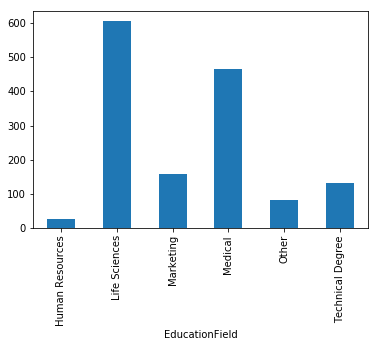

In [53]:
df.groupby('EducationField')['Age'].count().plot(kind="bar")

## Maximum Employee Are Have Life Sciencce And Least Are From Human Resources  Of Education Field

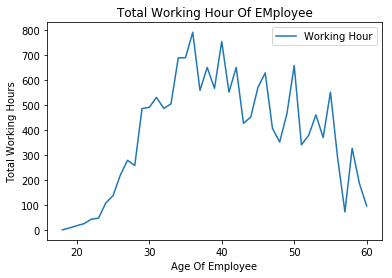

In [54]:
plt.plot(df.groupby('Age')['TotalWorkingYears'].sum(),label='Working Hour')
plt.title('Total Working Hour Of EMployee')
plt.xlabel('Age Of Employee')     
plt.ylabel('Total Working Hours')
plt.legend()

plt.show()

## Employees Of The Age group 35-40 Works Max

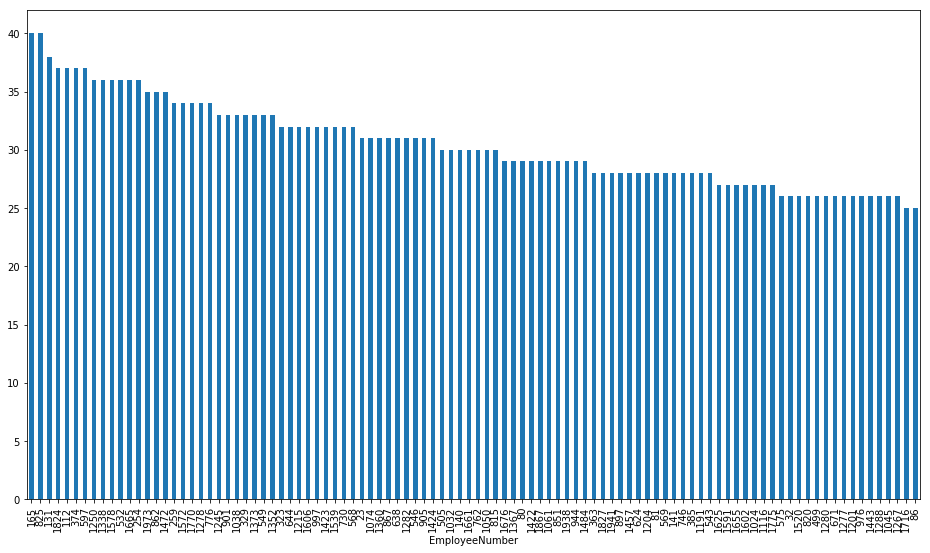

In [77]:
df.groupby('EmployeeNumber')['TotalWorkingYears'].sum().sort_values(ascending=False).head(100).plot(kind="bar", figsize=(16,9))

## EmployeeNumber 165 And 825 Have The Most Experience 

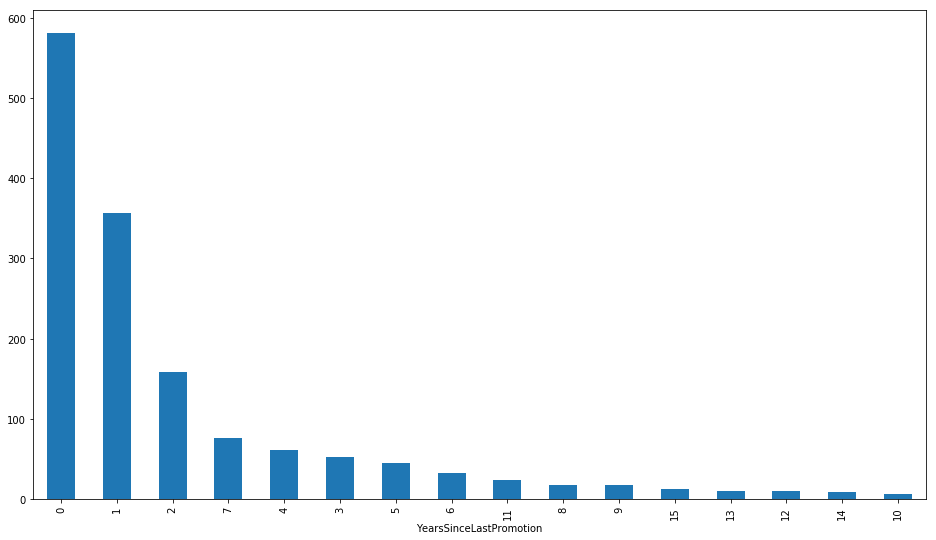

In [81]:
df.groupby('YearsSinceLastPromotion')['EmployeeNumber'].count().sort_values(ascending=False).head(100).plot(kind="bar", figsize=(16,9))

##  580 Employee Got Promotion This Year

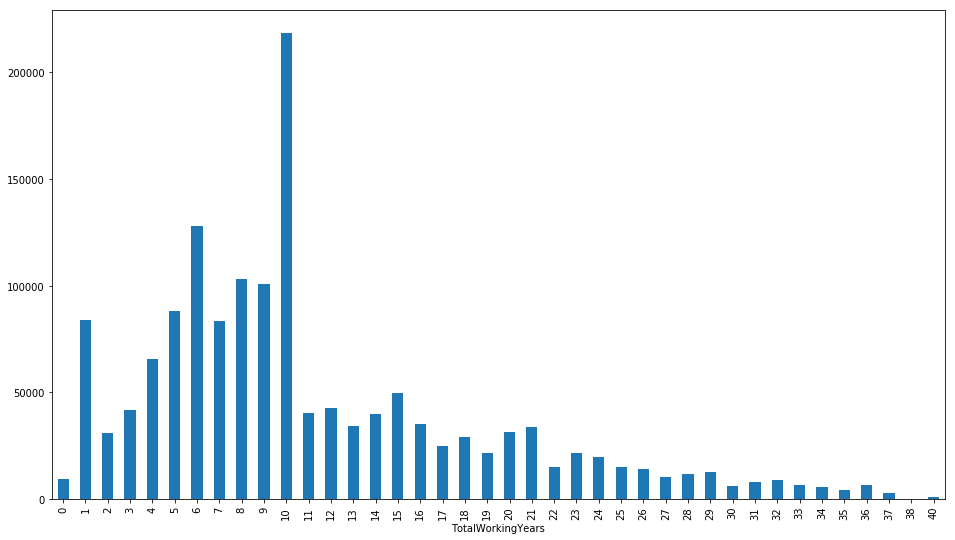

In [84]:
df.groupby('TotalWorkingYears')['EmployeeNumber'].sum().plot(kind="bar", figsize=(16,9))

## Maximum Employee Have  10 Year Experience

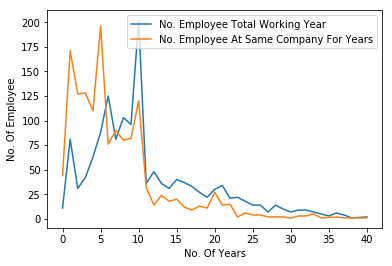

In [109]:
plt.plot(df.groupby('TotalWorkingYears')['EmployeeNumber'].nunique(),label='No. Employee Total Working Year')
plt.plot(df.groupby('YearsAtCompany')['EmployeeNumber'].nunique(),label='No. Employee At Same Company For Years')
plt.xlabel('No. Of Years')
plt.ylabel('No. Of Employee')
plt.legend()

plt.show()

In [107]:
df.groupby('EmployeeNumber')['TotalWorkingYears'].sum()

EmployeeNumber
1        8
2       10
4        7
5        8
7        6
8        8
10      12
11       1
12      10
13      17
14       6
15      10
16       5
18       3
19       6
20      10
21       7
22       1
23      31
24       6
26       5
27      10
28      13
30       0
31       8
32      26
33      10
35      10
36      24
38      22
        ..
2025    18
2026    13
2027     4
2031    24
2032    14
2034    21
2035     8
2036    15
2037    14
2038     4
2040     9
2041    10
2044    12
2045     8
2046     8
2048     8
2049    10
2051    20
2052     4
2053    10
2054     5
2055    20
2056    21
2057    10
2060     5
2061    17
2062     9
2064     6
2065    17
2068     6
Name: TotalWorkingYears, Length: 1470, dtype: int64

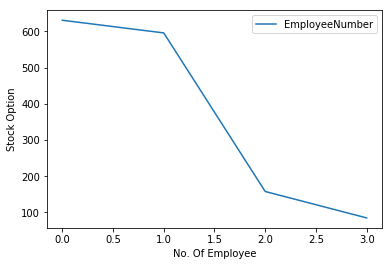

In [118]:
plt.plot(df.groupby('StockOptionLevel')['EmployeeNumber'].count())
plt.xlabel('No. Of Employee')
plt.ylabel('Stock Option')
plt.legend()
plt.show()


## Let's Visualize It More Clearly

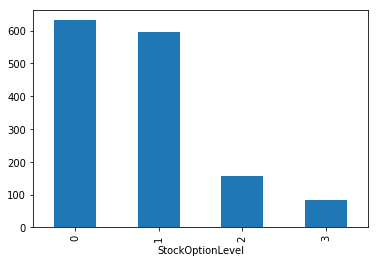

In [120]:
df.groupby('StockOptionLevel')['EmployeeNumber'].count().plot(kind='bar')

## Maximum Employee Have 0 Level Stock Option

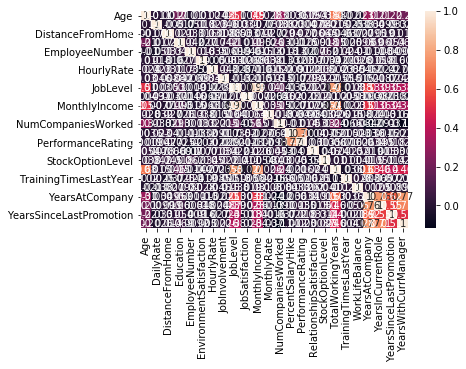

In [125]:
sns.heatmap(df.corr(),annot=True)